# Q3.2 Visualize the simulation of free falling

## Define the function which is shown in 'Q3_2_func.py'

In [39]:
import numpy as np
from scipy.integrate import odeint

In [42]:
import numpy as np
from scipy.integrate import odeint

def func(theta_at_0): # Parameters are the initial values of θ
    m1 = 1
    m2 = 1
    L1 = 0.5
    L2 = 0.5
    g = 9.81

    def ode(x,t,m1,m2,L1,L2,g):
        x1,x2,x3,x4 = x
        tau = np.array([[0], [0]])
        M = np.mat([[m1*(L1**2) + m2*(L1**2 + 2*L1*L2*np.cos(x2) + L2**2), m2*(L1*L2*np.cos(x2) + L2**2)], \
                [m2*(L1*L2*np.cos(x2) + L2**2), m2*(L2**2)]]) # M
        M_inv = np.mat([[1 / ((L1**2)*(m1 + m2*(np.sin(x2))**2)), -1*(L1*np.cos(x2) + L2) / ((L1**2)*L2*(m1 + m2*(np.sin(x2))**2))], \
            [-1*(L1*np.cos(x2) + L2) / ((L1**2)*L2*(m1 + m2*(np.sin(x2))**2)), \
                (m1*L1**2 + m2*(L1**2 + 2*L1*L2*np.cos(x2) + L2**2)) / (m2*(L1**2)*(L2**2)*(m1 + m2*(np.sin(x2))**2))]]) # Inverse of M
        C = np.array([[-1*m2*L1*L2*np.sin(x2)*(2*x3*x4 + x4**2)], [m2*L1*L2*(x3**2)*np.sin(x2)]]) # c
        G = np.array([[(m1+m2)*L1*g*np.cos(x1) + m2*g*L2*np.cos(x1 + x2)], [m2*g*L2*np.cos(x1 + x2)]]) # g(θ)
        x1_dot = x3
        x2_dot = x4
        x34_dot = np.dot(M.I, (tau - C - G))
        x3_dot = x34_dot[0,0]
        x4_dot = x34_dot[1,0]
        return [x1_dot, x2_dot, x3_dot, x4_dot]
    
    t_length = 5 # The time length is 5s
    dt = 0.01 # The time interval is 0.01s
    times = np.arange(0,t_length,dt)
    x_init = np.hstack((theta_at_0, np.array([0,0]))) # Angular speed is 0 when starting
    x_traj = odeint(ode, x_init, times, args=(m1,m2,L1,L2,g)) # Solve differential equations
    
    theta1 = x_traj[:,0] # θ1
    theta2 = x_traj[:,1] # θ2
    x1 = L1*np.cos(theta1) # x of link1 end
    y1 = L1*np.sin(theta1) # y of link1 end
    x2 = L1*np.cos(theta1) + L2*np.cos(theta1+theta2) # x of link2 end
    y2 = L1*np.sin(theta1) + L2*np.sin(theta1+theta2) # y of link2 end
    return [x1, y1, x2, y2]

## i. Make the animation for initial θ1=0, θ2=pi/2

In [43]:
input = np.array([0,np.pi/2]) # Set the initial θ1=0, θ2=pi/2
[x1, y1, x2, y2] = func(input)

In [44]:
import matplotlib.pyplot as plt

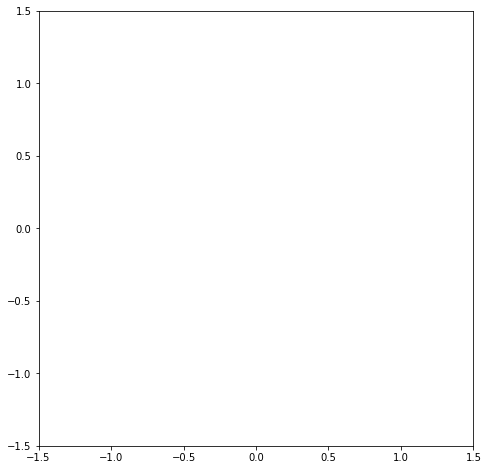

In [45]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_aspect('equal', adjustable='box')
ln1, = plt.plot([],[], color='r', linewidth = '3')
ln2, = plt.plot([],[], color='b', marker = 'o',ms = 8)
ln3, = plt.plot([],[], color='r', linewidth = '3')
ln4, = plt.plot([],[], color='b', marker = 'o',ms = 8)

In [46]:
def animate(i):
    ln1.set_data([0, x1[i]],[0, y1[i]])
    ln2.set_data(x1[i], y1[i])
    ln3.set_data([x1[i], x2[i]],[y1[i], y2[i]])
    ln4.set_data(x2[i], y2[i])

In [47]:
from matplotlib import animation

In [48]:
t_range = 5
dt = 0.01
n_frame = np.rint(t_range/dt).astype(int)
ani = animation.FuncAnimation(fig, animate, frames=n_frame, interval=30)
ani.save('Q3_i.gif',writer='pillow')
plt.close()

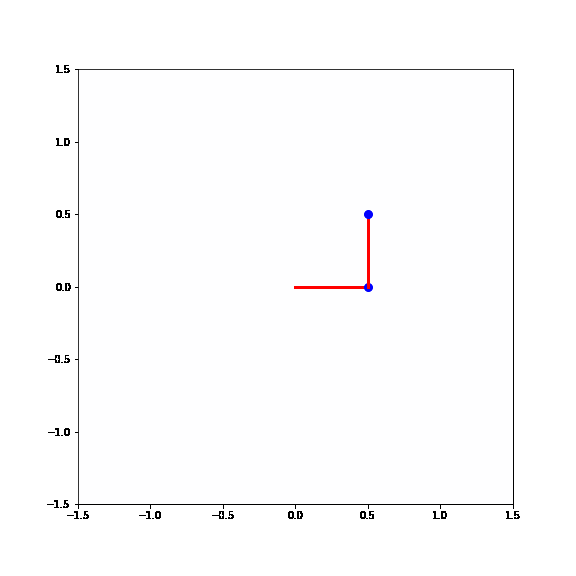

In [51]:
from IPython.display import Image
Image(filename="Q3_i.gif")

## ii. Make the animation for initial θ1=0, θ2=-pi/2

In [25]:
input = np.array([0,-np.pi/2]) # Set the initial θ1=0, θ2=-pi/2
[x1, y1, x2, y2] = func(input)

In [26]:
t_range = 5
dt = 0.01
n_frame = np.rint(t_range/dt).astype(int)
ani = animation.FuncAnimation(fig, animate, frames=n_frame, interval=30)
ani.save('Q3_ii.gif',writer='pillow')
plt.close()

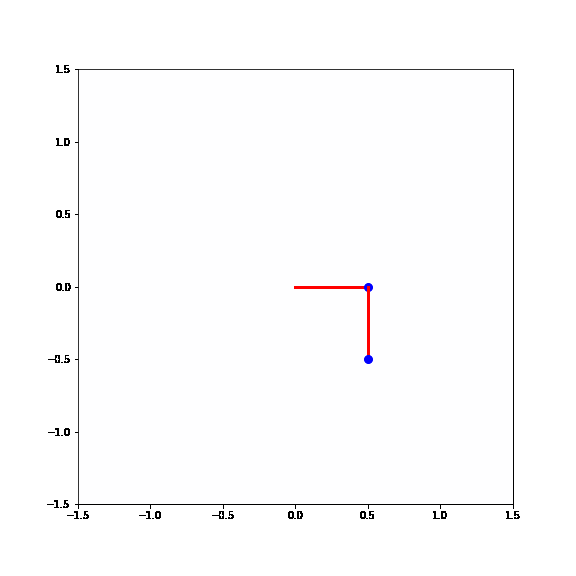

In [38]:
Image(filename="Q3_ii.gif")